## Loan Eligiblity Prediction

Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after the company validates the customer eligibility for a loan.

The company wants to automate the loan eligility process (real-time) based on customer detail provided while filling the online application form.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Read dataset

In [2]:
dataset = pd.read_csv("loan-train.csv")

#train dataset for the prediction analysis. 

#This dataset has the features and label (loan status)

In [3]:
dataset.head()

#view dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


### Information from Dataset

In [5]:
dataset.shape

(614, 13)

#### Data Insight

There are 614 rows or entries in the dataset

and 13 columns or features.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Data Insights

Dataset contains 5 numerical data type: 1 integer and 4 float data types.
    
There are 8 string data type.

In [7]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Data Insights:

1 Mean values

2 Standard Deviation

3 Minimum values

4 Maximum values

5 There are 614 data entries in the dataset


In [8]:
dataset.values

array([['LP001002', 'Male', 'No', ..., 1.0, 'Urban', 'Y'],
       ['LP001003', 'Male', 'Yes', ..., 1.0, 'Rural', 'N'],
       ['LP001005', 'Male', 'Yes', ..., 1.0, 'Urban', 'Y'],
       ...,
       ['LP002983', 'Male', 'Yes', ..., 1.0, 'Urban', 'Y'],
       ['LP002984', 'Male', 'Yes', ..., 1.0, 'Urban', 'Y'],
       ['LP002990', 'Female', 'No', ..., 0.0, 'Semiurban', 'N']],
      dtype=object)

In [9]:
dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Data Insights:

There are missing values in 7 columns of the dataset.

for accuracy of the prediction, these missing values shall be filled up. 

### Visualization

In [11]:
pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'], margins=True)

#credit history affects loan application

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


#### Data Insights:

credit history affects each applicant

Applicants with credit history of 1 are more eligible for loan

<AxesSubplot:>

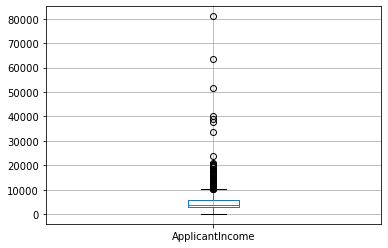

In [12]:
dataset.boxplot(column='ApplicantIncome')

#### Data Insights:

Alot of outliers for this variable

<AxesSubplot:>

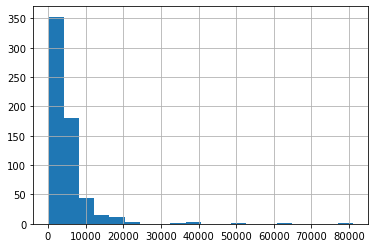

In [13]:
dataset['ApplicantIncome'].hist(bins=20)

#### Data Insights:

right skewed histogram.

the values have to be normalized.

<AxesSubplot:>

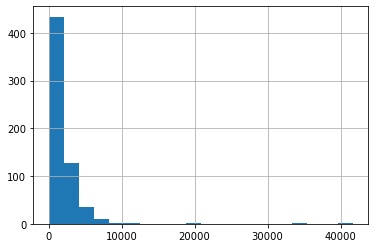

In [14]:
dataset['CoapplicantIncome'].hist(bins=20)

#### Data Insights:

Right skewed histogram

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

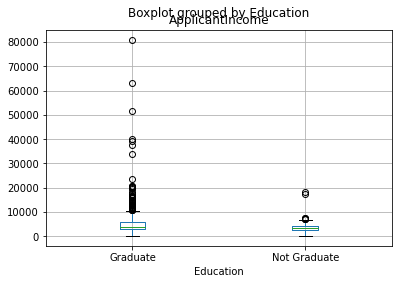

In [15]:
dataset.boxplot(column='ApplicantIncome', by='Education')

#### Data Insights:

no much variation in mid salary for graduates and non graduates

<AxesSubplot:>

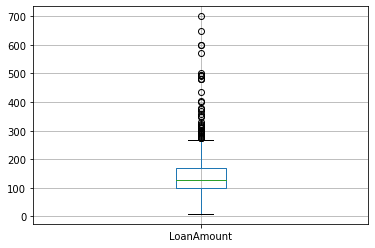

In [16]:
dataset.boxplot(column='LoanAmount')

#### Dataset Insights

Few outliers

<AxesSubplot:>

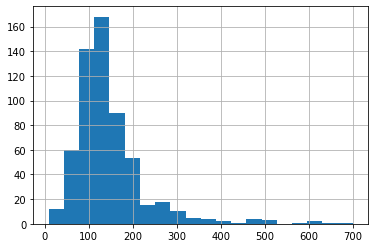

In [17]:
dataset['LoanAmount'].hist(bins=20)

#### Data Insights:

Loan amount is a little right skewed

### Data Cleaning

In [18]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
#replace missing values

dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)

#mode for categorical variable

In [20]:
#replace missing values

dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True)

In [21]:
#replace missing values

dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)

In [22]:
#replace missing values

dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace=True)

In [23]:
#replace missing values

dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)

In [24]:
#replace missing values

dataset.LoanAmount = dataset.LoanAmount.fillna(dataset['LoanAmount'].mean())

#mean for numerical variable

In [25]:
#replace missing values

dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)

In [26]:
dataset.isnull().sum()

#check for missing values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Data Insights:

No more missing values

### Normalizing variables with outliers

In [27]:
dataset['LoanAmount_log']=np.log(dataset['LoanAmount'])

#normalize LoanAmount

<AxesSubplot:>

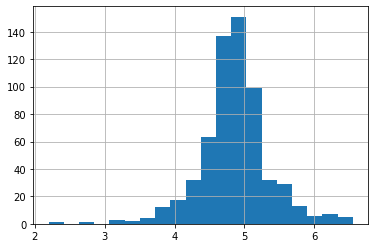

In [28]:
dataset['LoanAmount_log'].hist(bins=20)

#### Data Insights:

LoanAmount looks more normalized now.

In [29]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [30]:
dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']

In [31]:
dataset['TotalIncome_log'] = np.log(dataset['TotalIncome'])

<AxesSubplot:>

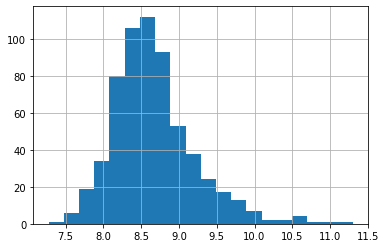

In [32]:
dataset['TotalIncome_log'].hist(bins=20)

#### Data Insights:

The values are completely normalized

In [33]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


#### Divide dataset into two variables: dependent & independent

X = independent variables

y = dependent variables


In [34]:
X = dataset.iloc[:,np.r_[1:5, 9:11,13:15]].values

In [35]:
y = dataset.iloc[:,12].values

In [36]:
X,y

(array([['Male', 'No', '0', ..., 1.0, 4.986425672954842, 5849.0],
        ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
        ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
        ...,
        ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
        ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
        ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
       dtype=object),
 array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
        'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
        'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
        'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
        'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
        'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
        'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
        'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',

In [37]:
# X = dataset.drop(columns=['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Status'])
# x = dataset['Loan_Status']

#### Split dataset into train and test dataset

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#setting random_state=0 to keep the result unchanged any time will run it

In [39]:
print(X_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 5858.0]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 11250.0]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 8334.0]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 6033.0]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 6486.0]]


#### converting categorical values to numerical values

In [40]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [41]:
for i in range(0,5):
    X_train[:,i] = labelencoder_X.fit_transform(X_train[:,i])

In [42]:
X_train[:,7] = labelencoder_X.fit_transform(X_train[:,7])

In [43]:
X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [44]:
labelencoder_y = LabelEncoder()

#create another instance for y dataset

In [45]:
y_train = labelencoder_y.fit_transform(y_train)

In [46]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

#### Data Insights:

yes & no values converted to 1 & 0

In [47]:
for i in range(0,5):
    X_test[:,i] = labelencoder_X.fit_transform(X_test[:,i])

In [48]:
X_test[:,7] = labelencoder_X.fit_transform(X_test[:,7])

In [49]:
y_test = labelencoder_y.fit_transform(y_test)

### Scale data for machine learning 

This is because of the different variables in the dataset.

Analysis and prediction becomes better with scaling.

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
ss = StandardScaler()

In [52]:
X_train = ss.fit_transform(X_train)

In [53]:
X_test = ss.fit_transform(X_test)

## Applying Algorithm

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
DTClassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [56]:
DTClassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Prediction

In [57]:
y_pred = DTClassifier.predict(X_test)

In [58]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [59]:
#check accuracy of prediction

from sklearn import metrics

print('The accuracy of decision tree is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of decision tree is:  0.6991869918699187


#### Data Insights:

The accuracy is approximately 70% which is low

Lets work with another algorithm

### Naive Bayes Algorithm

In [60]:
from sklearn.naive_bayes import GaussianNB

NBClassifier = GaussianNB()

In [61]:
NBClassifier.fit(X_train, y_train)

GaussianNB()

In [62]:
y_pred = NBClassifier.predict(X_test)

In [63]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [64]:
# check accuracy 
print('The accuracy of Naive Bayes is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Naive Bayes is:  0.8292682926829268


#### Data Insights

Naive Bayes has a higher prediction accuracy of 83%

## Modeling

Import new (test) dataset. This dataset has no label (loan status).

Applying the algorithm with the highest accuracy to predict the loan status of each applicant.

In [65]:
testdata = pd.read_csv('loan-test.csv')

In [66]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


#### Data Insights:

testdata has no label i.e. no loan status

In [67]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [68]:
testdata.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


#### Data Insights:

testdata contains 367 data entries i.e. 367 rows

and 12 columns or variables

In [69]:
#check for missing values

testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

#### Data Insights:

There are missing values in 6 columns that need filled for better prediction

<AxesSubplot:>

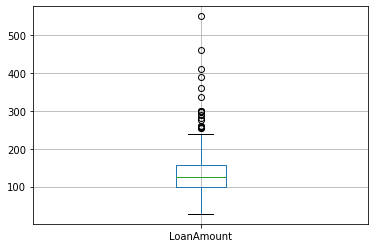

In [70]:
testdata.boxplot(column='LoanAmount')

<AxesSubplot:>

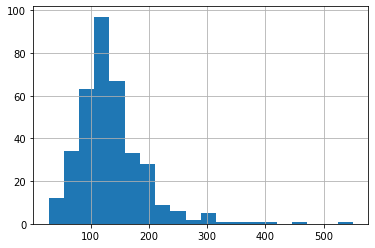

In [71]:
testdata['LoanAmount'].hist(bins=20)

#### Data Insights:

LoanAmount contains outliers and it is right skewed

<AxesSubplot:>

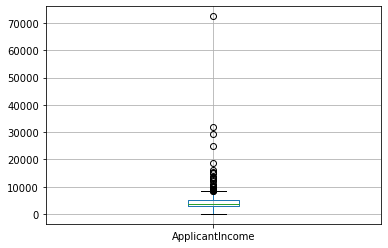

In [72]:
testdata.boxplot(column='ApplicantIncome')

<AxesSubplot:>

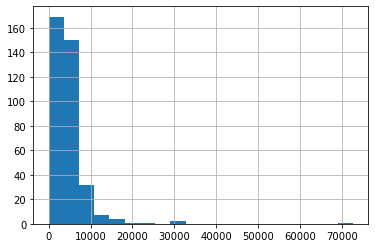

In [73]:
testdata['ApplicantIncome'].hist(bins=20)

#### Data Insights:

ApplicantIncome: right skewed and some outliers.

<AxesSubplot:>

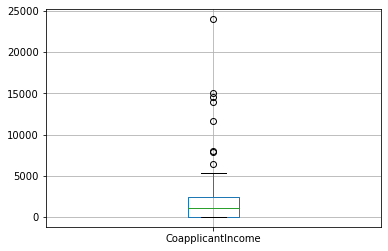

In [74]:
testdata.boxplot(column='CoapplicantIncome')

<AxesSubplot:>

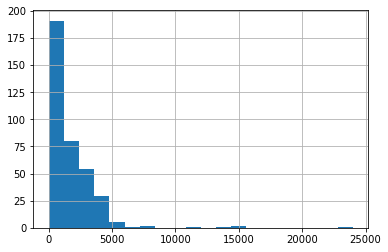

In [75]:
testdata['CoapplicantIncome'].hist(bins=20)

#### Data Insights:

CoapplicantIncome: right skewed and outliers.

### filling missing values

In [76]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0], inplace=True)

In [77]:
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0], inplace=True)

In [78]:
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0], inplace=True)

In [79]:
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0], inplace=True)

In [80]:
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0], inplace=True)

In [81]:
testdata['LoanAmount'] = testdata.LoanAmount.fillna(testdata['LoanAmount'].mean())

In [82]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#### Data Insights:

no more missing values

### Normalize to handle outliers

In [83]:
testdata['LoanAmount_log'] = np.log(testdata['LoanAmount'])

In [88]:
testdata['TotalIncome'] = testdata['ApplicantIncome'] + testdata['CoapplicantIncome']

In [89]:
testdata['TotalIncome_log'] = np.log(testdata['TotalIncome'])

In [90]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [100]:
#select the needed data

test = testdata.iloc[:, np.r_[1:5,9:11,13:15]].values

In [101]:
for i in range(0,5):
    test[:,i] = labelencoder_X.fit_transform(test[:,i])

In [102]:
test[:,7] = labelencoder_X.fit_transform(test[:,7])

In [103]:
test

array([[1, 1, 0, ..., 1.0, 5720, 207],
       [1, 1, 1, ..., 1.0, 4576, 124],
       [1, 1, 2, ..., 1.0, 6800, 251],
       ...,
       [1, 0, 0, ..., 1.0, 5243, 174],
       [1, 1, 0, ..., 1.0, 7393, 268],
       [1, 0, 0, ..., 1.0, 9200, 311]], dtype=object)

In [110]:
#scale the dataset. Feature scaling is essential for machine learning algorithms.

test = ss.fit_transform(test)

In [111]:
#predict whether a customer will be eligible based on Naive Bayes instance classifier

prediction = NBClassifier.predict(test)

In [112]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

#### Data Insights:

1 represent that the customer is eligible for the loan

0 represent that the customer is not eligible for the loan

## Further Work

Apply other classification algorithm like random forest